# Using a Keras Long Short-Term Memory (LSTM) Model to Predict Stock Prices

## Example 1

### Import Libraries and Dataset

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load in the Data
dataset_train = pd.read_csv('data/NSE-TATAGLOBAL.csv')
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
# Select the Open and High Columns for modeling
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [8]:
# Scale dataset to numbers between zero and one
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating Data with Timesteps

In [9]:
# Create data in 60 timesteps and convert to an array
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building the LSTM

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
regressor = Sequential()

# 50 units is the dimensionality of the output space
# return_sequences=True determines whether to return the last output in the output sequence or the full sequence
# input_shape is the shape of the training set

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


2022-07-26 18:56:55.289644: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


62/62 [==============================] - 5s 47ms/step - loss: 0.0102
Epoch 2/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0034
Epoch 3/100
62/62 [==============================] - 3s 49ms/step - loss: 0.0027
Epoch 4/100
62/62 [==============================] - 3s 49ms/step - loss: 0.0025
Epoch 5/100
62/62 [==============================] - 3s 49ms/step - loss: 0.0022
Epoch 6/100
62/62 [==============================] - 3s 50ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 3s 50ms/step - loss: 0.0025
Epoch 8/100
62/62 [==============================] - 3s 49ms/step - loss: 0.0020
Epoch 9/100
62/62 [==============================] - 3s 50ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 3s 50ms/step - loss: 0.0022
Epoch 11/100
62/62 [==============================] - 3s 50ms/step - loss: 0.0018
Epoch 12/100
62/62 [==============================] - 3s 51ms/step - loss: 0.0019
Epoch 13/100
62/62 [=================

### Predicting Future Stock Using the Test Set

1. Merge the training set and the test set on the 0 axis
2. Set the time stap as 60
3. Use MinMaxScaler to transform the new dataset
4. Reshape the dataset

In [13]:
dataset_test = pd.read_csv('data/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Plotting the Results

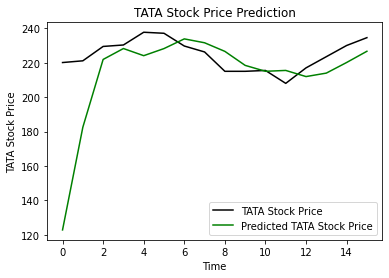

In [15]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

## Example 2

### Import Data

In [12]:
# Import Data
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
# Select the Open and High Columns
training_set = dataset_train.iloc[:, 1:2].values

### Data Normalization

In [16]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

### Incorporating Timesteps Into Data

In [18]:
# Create data in 60 timesteps
X_train = []
y_train = []

for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


### Creating the LSTM model

In [19]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 6s 51ms/step - loss: 0.0110
Epoch 2/100
62/62 [==============================] - 3s 52ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0030
Epoch 4/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0028
Epoch 5/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0031
Epoch 6/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0024
Epoch 8/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0022
Epoch 9/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0021
Epoch 12/100
62/62 [==============================] - 3s 54ms/step - loss: 0.0018
Epoch 13/100
62/62 [=====

### Making Predictions on the Test Set

In [24]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [28]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


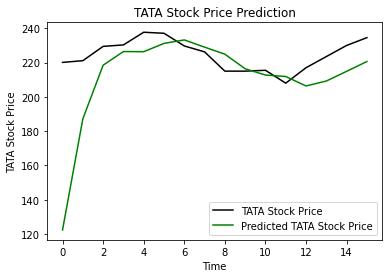

In [29]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()